In [1]:
%matplotlib inline
import numpy as np
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### 損失関数とは

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

### 勾配降下法とは

In [7]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w-delta, b), t_c)) / (2.0 * delta)

In [8]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w 

In [9]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / (2.0 * delta)
b = b - learning_rate + loss_rate_of_change_b

In [10]:
def dloss_fn(t_p, t_c):
    dsq_diffs = (t_p - t_c) * 2 / t_p.size(0)
    return dsq_diffs

In [11]:
def dmodel_dw(t_u, w, b):
    return w * t_u + b

def dmodel_db(t_u, w, b):
    return 1.0

In [12]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [34]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        if print_params:
            print('Epoch {}, Loss {}' .format(epoch, loss))
        
    return params

In [35]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c
)

Epoch 1, Loss 1763.884765625
Epoch 2, Loss 323.09051513671875
Epoch 3, Loss 164.01806640625
Epoch 4, Loss 102.4654541015625
Epoch 5, Loss 72.65221405029297
Epoch 6, Loss 56.40286636352539
Epoch 7, Loss 46.864601135253906
Epoch 8, Loss 40.97268295288086
Epoch 9, Loss 37.195621490478516
Epoch 10, Loss 34.705482482910156
Epoch 11, Loss 33.027652740478516
Epoch 12, Loss 31.877470016479492
Epoch 13, Loss 31.077943801879883
Epoch 14, Loss 30.515789031982422
Epoch 15, Loss 30.116777420043945
Epoch 16, Loss 29.831300735473633
Epoch 17, Loss 29.625669479370117
Epoch 18, Loss 29.47667694091797
Epoch 19, Loss 29.3681640625
Epoch 20, Loss 29.28874969482422
Epoch 21, Loss 29.230369567871094
Epoch 22, Loss 29.187278747558594
Epoch 23, Loss 29.155317306518555
Epoch 24, Loss 29.131507873535156
Epoch 25, Loss 29.113666534423828
Epoch 26, Loss 29.1002197265625
Epoch 27, Loss 29.09001350402832
Epoch 28, Loss 29.082197189331055
Epoch 29, Loss 29.076154708862305
Epoch 30, Loss 29.071413040161133
Epoch 31, 

tensor([ 0.2330, -0.0527])

#### 入力の正規化

In [36]:
t_un = 0.1 * t_u

In [37]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 1, Loss 80.36434173583984
Epoch 2, Loss 37.574913024902344
Epoch 3, Loss 29.5773868560791
Epoch 4, Loss 29.4614200592041
Epoch 5, Loss 29.361833572387695
Epoch 6, Loss 29.27099609375
Epoch 7, Loss 29.179931640625
Epoch 8, Loss 29.089319229125977
Epoch 9, Loss 28.99882698059082
Epoch 10, Loss 28.908458709716797
Epoch 11, Loss 28.8182315826416
Epoch 12, Loss 28.72813606262207
Epoch 13, Loss 28.6381778717041
Epoch 14, Loss 28.548358917236328
Epoch 15, Loss 28.458677291870117
Epoch 16, Loss 28.369129180908203
Epoch 17, Loss 28.27972412109375
Epoch 18, Loss 28.190458297729492
Epoch 19, Loss 28.101329803466797
Epoch 20, Loss 28.012340545654297
Epoch 21, Loss 27.923500061035156
Epoch 22, Loss 27.83479118347168
Epoch 23, Loss 27.746234893798828
Epoch 24, Loss 27.657814025878906
Epoch 25, Loss 27.569547653198242
Epoch 26, Loss 27.481422424316406
Epoch 27, Loss 27.39344024658203
Epoch 28, Loss 27.30560874938965
Epoch 29, Loss 27.217920303344727
Epoch 30, Loss 27.130388259887695
Epoch 31, L

tensor([ 2.8665, -2.8352])

In [40]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    print_params=False
)
params

tensor([  5.3677, -17.3046])

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt 

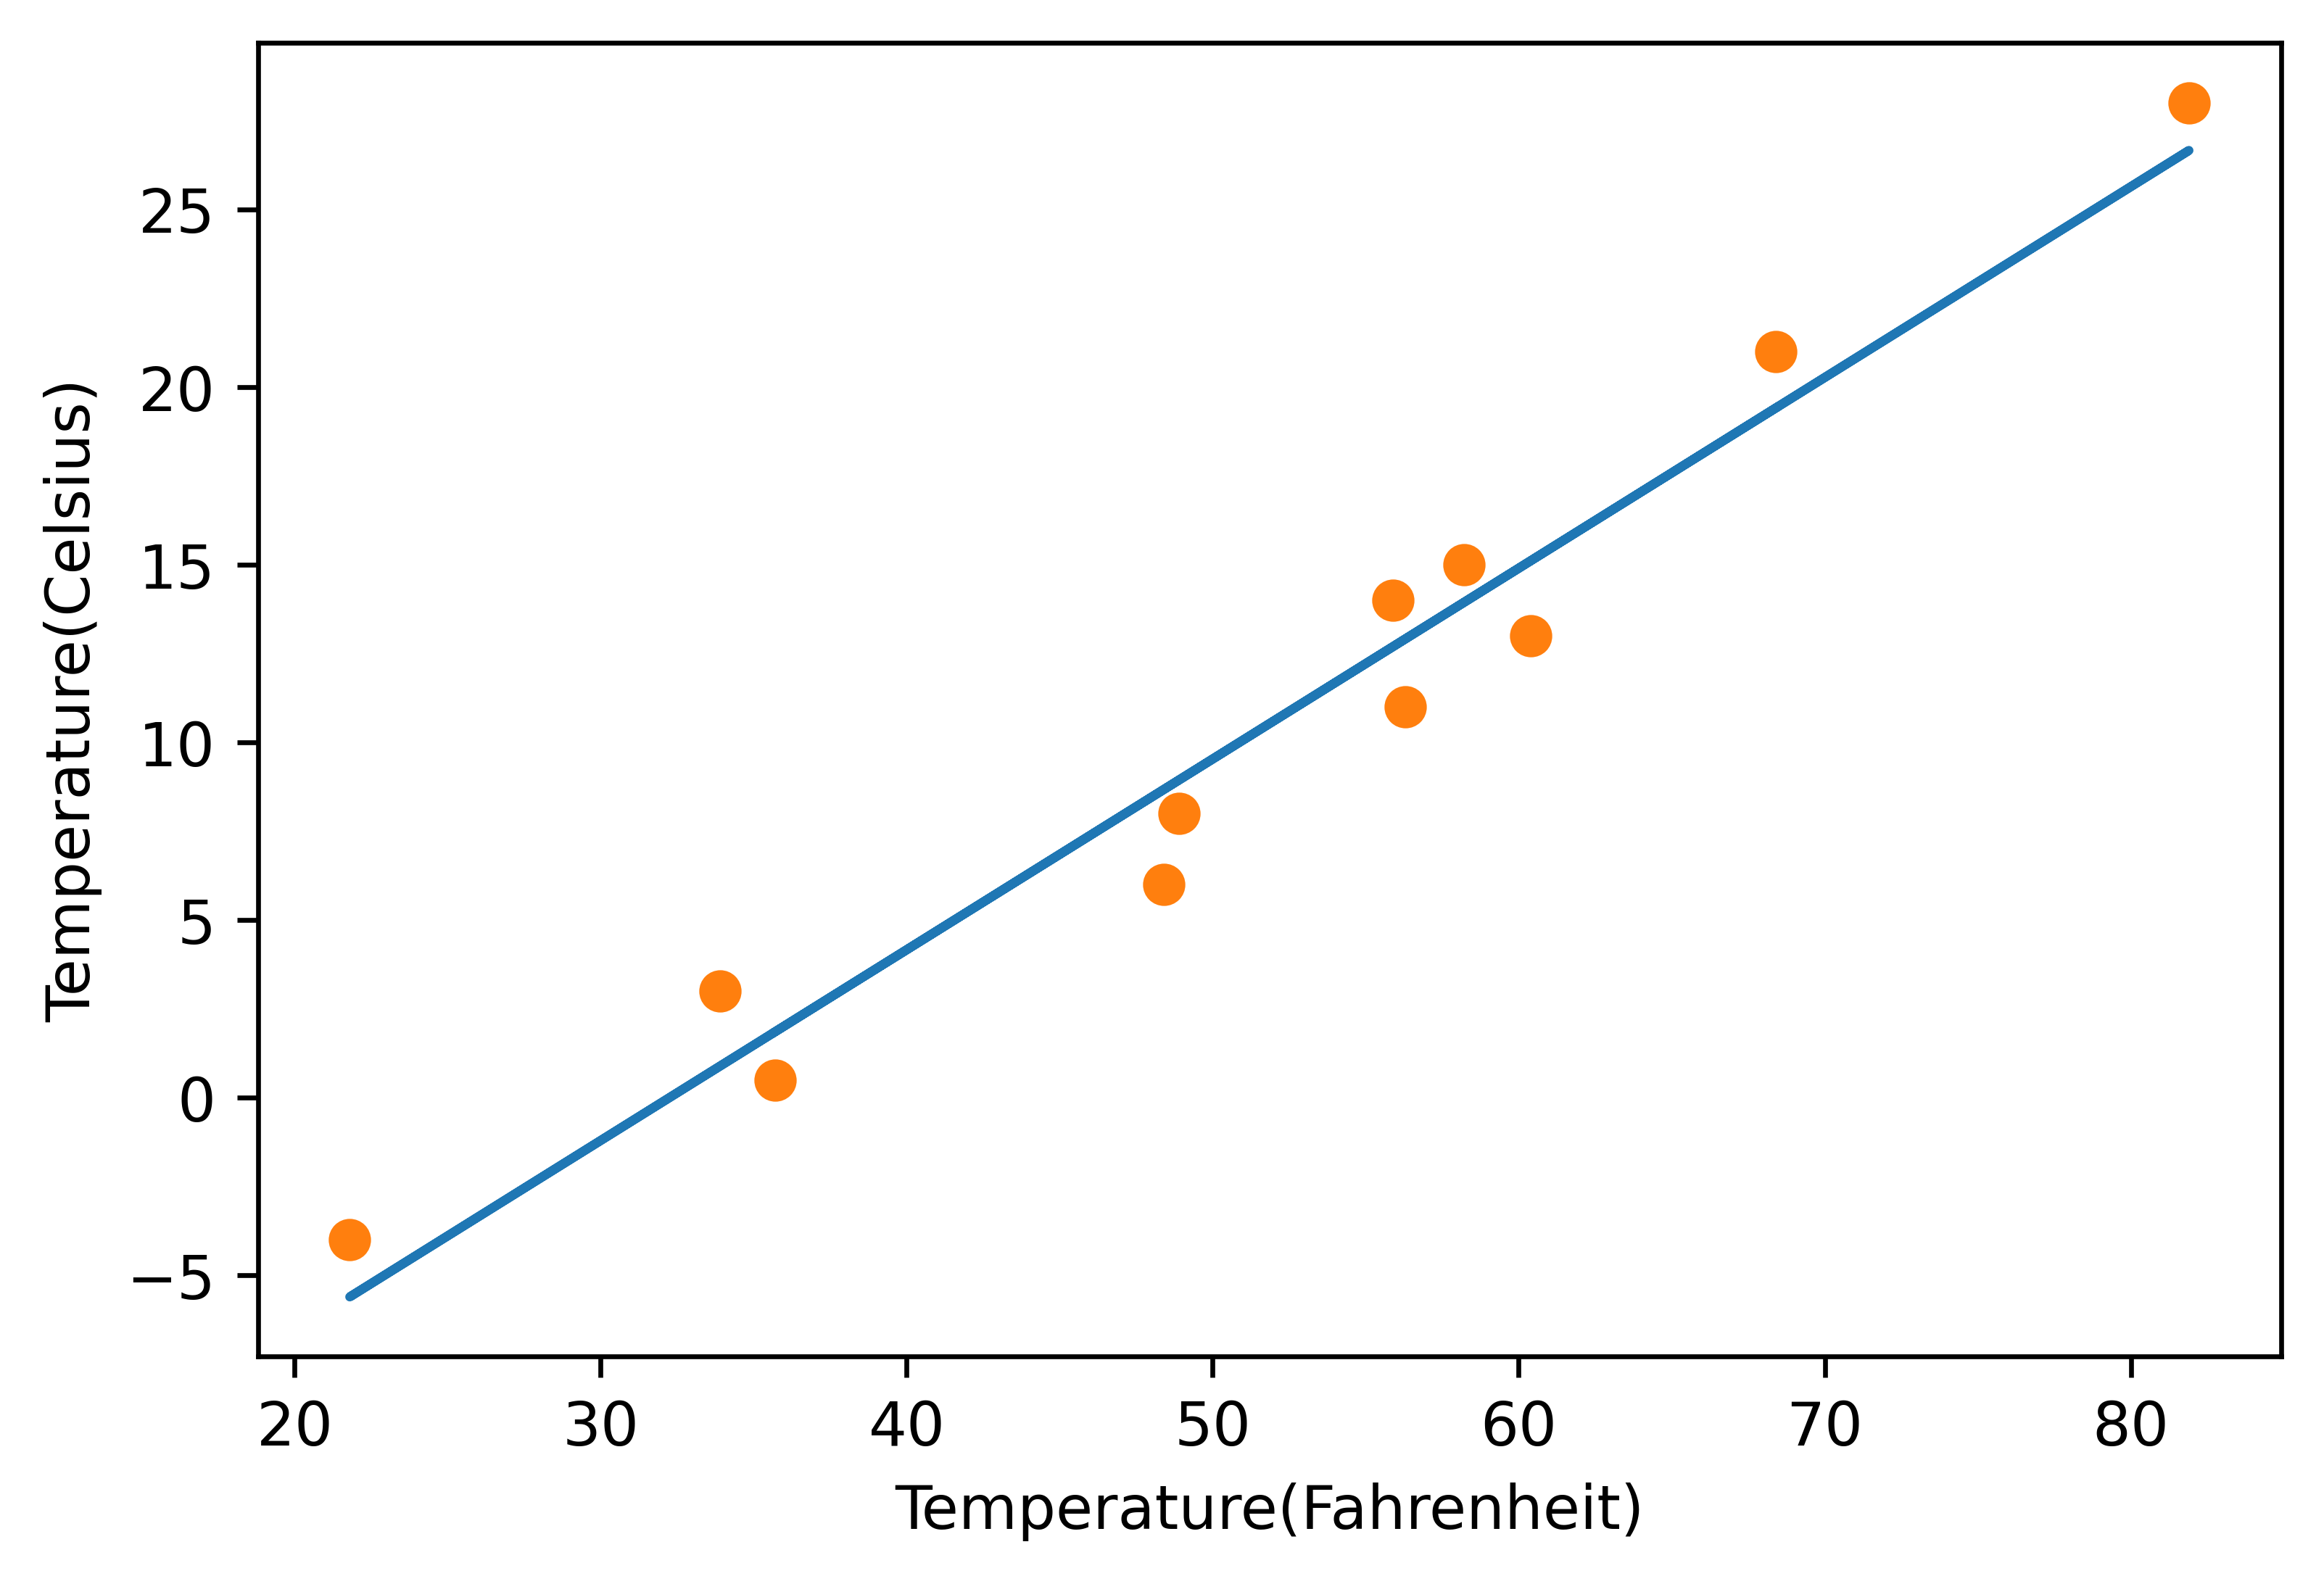

In [44]:
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel('Temperature(Fahrenheit)')
plt.ylabel('Temperature(Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [47]:
a = torch.tensor([2,3,4])
b = torch.tensor([3.4,5,5])
torch.stack([a, b])

tensor([[2.0000, 3.0000, 4.0000],
        [3.4000, 5.0000, 5.0000]])

# PyTorchを用いた勾配計算からバックプロパゲーションまで

In [48]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [49]:
params.grad is None

True

In [51]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [52]:
params.grad

tensor([4517.2969,   82.6000])

In [53]:
if params.grad is not None:
    params.grad.zero_()

In [54]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch:{}, Loss:{}'.format(epoch, float(loss)))
            
    return params

In [56]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch:500, Loss:7.860115051269531
Epoch:1000, Loss:3.828537940979004
Epoch:1500, Loss:3.092191219329834
Epoch:2000, Loss:2.957697868347168
Epoch:2500, Loss:2.933133840560913
Epoch:3000, Loss:2.9286484718322754
Epoch:3500, Loss:2.9278297424316406
Epoch:4000, Loss:2.9276793003082275
Epoch:4500, Loss:2.927651882171631
Epoch:5000, Loss:2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [57]:
import torch.optim as optim

In [58]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [60]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [61]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [64]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [65]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
            
        if epoch % 500 == 0:
            print('Epoch:{}, Loss:{}'.format(epoch, float(loss)))
            
    return params

In [66]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch:500, Loss:7.860119819641113
Epoch:1000, Loss:3.828537940979004
Epoch:1500, Loss:3.092191219329834
Epoch:2000, Loss:2.957697868347168
Epoch:2500, Loss:2.933133840560913
Epoch:3000, Loss:2.9286484718322754
Epoch:3500, Loss:2.9278297424316406
Epoch:4000, Loss:2.9276793003082275
Epoch:4500, Loss:2.927651882171631
Epoch:5000, Loss:2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [67]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs=2000,
    optimizer=optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch:500, Loss:7.612900257110596
Epoch:1000, Loss:3.086700439453125
Epoch:1500, Loss:2.928579092025757
Epoch:2000, Loss:2.9276442527770996


tensor([  0.5367, -17.3021], requires_grad=True)

#### データセットの分割

In [68]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3, 2, 1, 5, 6, 4, 9, 7, 0]), tensor([10,  8]))

In [69]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [70]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch:{}, Training loss{:.4f}, Validaton loss{:.4f}'.format(epoch, train_loss.item(), val_loss.item()))
            
    return params

In [71]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params,
              train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c=val_t_c)

Epoch:1, Training loss75.7952, Validaton loss100.9256
Epoch:2, Training loss38.2342, Validaton loss44.6465
Epoch:3, Training loss31.5485, Validaton loss32.3576
Epoch:500, Training loss6.4860, Validaton loss11.6878
Epoch:1000, Training loss3.0221, Validaton loss7.4872
Epoch:1500, Training loss2.5218, Validaton loss6.1733
Epoch:2000, Training loss2.4496, Validaton loss5.7147
Epoch:2500, Training loss2.4391, Validaton loss5.5463
Epoch:3000, Training loss2.4376, Validaton loss5.4832


tensor([  5.2245, -16.4587], requires_grad=True)

In [72]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [73]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss